# Project: Decoding Molecules From Fingerprints.
## Group Members:
### Qi Chen, e-mail: gusqichr@student.gu.se
### Nils Dunlop, e-mail: gusdunlni@student.gu.se
### Francisco Alejandro Erazo Piza, e-mail: guserafr@student.gu.se
***

In [19]:
import os
import pandas as pd
from rdkit.Chem import PandasTools
import numpy as np
from joblib import Parallel, delayed
from rdkit.DataStructs import TanimotoSimilarity
from rdkit.Chem import Draw
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors as mcolors
import numpy
from PIL import Image
import subprocess
from rdkit.Chem import AllChem
from typing import List, Tuple
import subprocess
from concurrent.futures import ThreadPoolExecutor, as_completed
from rdkit import Chem
from rdkit.Chem.rdFingerprintGenerator import GetMorganGenerator
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import DataStructs
from sklearn.manifold import MDS
from sklearn.manifold import TSNE
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)

### Define directories
***

In [20]:
# Set user directory
USER_DIR = os.path.expanduser('~')

# Set the project root directory
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), '..'))

# Define the input and output directories
INPUT_DIR = os.path.join(PROJECT_ROOT, 'data/bit_flipping_nn')



### Load Parecoxib, Celecoxib, Cimicoxib and Deracoxib, Anitrazafen Data
***

In [21]:
# Read COX2_SMILES.csv
parecoxib_df = pd.read_parquet(os.path.join(INPUT_DIR, 'parecoxib_flipped_df.parquet'))
print(f"Parecoxib shape: {parecoxib_df.shape}")

celecoxib_df = pd.read_parquet(os.path.join(INPUT_DIR, 'celecoxib_flipped_df.parquet'))
print(f"Celecoxib shape: {celecoxib_df.shape}")

cimicoxib_df = pd.read_parquet(os.path.join(INPUT_DIR, 'cimicoxib_flipped_df.parquet'))
print(f"Cimicoxib shape: {cimicoxib_df.shape}")

deracoxib_df = pd.read_parquet(os.path.join(INPUT_DIR, 'deracoxib_flipped_df.parquet'))
print(f"Deracoxib shape: {deracoxib_df.shape}")

anitrazafen_df = pd.read_parquet(os.path.join(INPUT_DIR, 'anitrazafen_flipped_df.parquet'))
print(f"Anitrazafen shape: {anitrazafen_df.shape}")


Parecoxib shape: (2048, 9)
Celecoxib shape: (2048, 9)
Cimicoxib shape: (2048, 9)
Deracoxib shape: (2048, 9)
Anitrazafen shape: (2048, 9)


In [22]:
parecoxib_df.head()

,title,SMILES,FingerprintBits,SparseFingerprintBits,FingerprintBitsFlipped,SparseFingerprintBitsFlipped,FlippedBitPosition,Generated_SMILES,Device_Used
0,Parecoxib,CCC(=O)NS(=O)(=O)c1ccc(cc1)c2c(C)onc2c3ccccc3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]",41 80 179 248 294 307 319 323 331 350 361 378 389 461 471 476 502 624 650 656 715 736 807 835 883 896 898 1045 1057 1088 1141 1152 1160 1199 1366 1380 1476 1542 1722 1746 1747 1750 1873 1917,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]","[0, 41, 80, 179, 248, 294, 307, 319, 323, 331, 350, 361, 378, 389, 461, 471, 476, 502, 624, 650, 656, 715, 736, 807, 835, 883, 896, 898, 1045, 1057, 1088, 1141, 1152, 1160, 1199, 1366, 1380, 1476, 1542, 1722, 1746, 1747, 1750, 1873, 1917]",0,CCC(=O)NS(=O)(=O)c1ccc(-c2c(-c3ccccc3)noc2C)cc1,cuda
1,Parecoxib,CCC(=O)NS(=O)(=O)c1ccc(cc1)c2c(C)onc2c3ccccc3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]",41 80 179 248 294 307 319 323 331 350 361 378 389 461 471 476 502 624 650 656 715 736 807 835 883 896 898 1045 1057 1088 1141 1152 1160 1199 1366 1380 1476 1542 1722 1746 1747 1750 1873 1917,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]","[1, 41, 80, 179, 248, 294, 307, 319, 323, 331, 350, 361, 378, 389, 461, 471, 476, 502, 624, 650, 656, 715, 736, 807, 835, 883, 896, 898, 1045, 1057, 1088, 1141, 1152, 1160, 1199, 1366, 1380, 1476, 1542, 1722, 1746, 1747, 1750, 1873, 1917]",1,CCC(=O)NS(=O)(=O)c1ccc(-c2c(-c3ccccc3)noc2C)cc1,cuda
2,Parecoxib,CCC(=O)NS(=O)(=O)c1ccc(cc1)c2c(C)onc2c3ccccc3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]",41 80 179 248 294 307 319 323 331 350 361 378 389 461 471 476 502 624 650 656 715 736 807 835 883 896 898 1045 1057 1088 1141 1152 1160 1199 1366 1380 1476 1542 1722 1746 1747 1750 1873 1917,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]","[2, 41, 80, 179, 248, 294, 307, 319, 323, 331, 350, 361, 378, 389, 461, 471, 476, 502, 624, 650, 656, 715, 736, 807, 835, 883, 896, 898, 1045, 1057, 1088, 1141, 1152, 1160, 1199, 1366, 1380, 1476, 1542, 1722, 1746, 1747, 1750, 1873, 1917]",2,CCC(=O)NS(=O)(=O)c1ccc(-c2c(-c3ccccc3)noc2C)cc1,cuda
3,Parecoxib,CCC(=O)NS(=O)(=O)c1ccc(cc1)c2c(C)onc2c3ccccc3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"

### Validate generated SMILES
***

In [23]:
# Function to validate generated SMILES
def smiles_to_mol(smiles):
    mol = Chem.MolFromSmiles(smiles)
    return mol is not None, mol

In [24]:
# Validate generated SMILES
parecoxib_df['Valid_SMILES'], parecoxib_df['Molecule'] = zip(*parecoxib_df['Generated_SMILES'].apply(lambda x: smiles_to_mol(x)))
celecoxib_df['Valid_SMILES'], celecoxib_df['Molecule'] = zip(*celecoxib_df['Generated_SMILES'].apply(lambda x: smiles_to_mol(x)))
cimicoxib_df['Valid_SMILES'], cimicoxib_df['Molecule'] = zip(*cimicoxib_df['Generated_SMILES'].apply(lambda x: smiles_to_mol(x)))
deracoxib_df['Valid_SMILES'], deracoxib_df['Molecule'] = zip(*deracoxib_df['Generated_SMILES'].apply(lambda x: smiles_to_mol(x)))
anitrazafen_df['Valid_SMILES'], anitrazafen_df['Molecule'] = zip(*anitrazafen_df['Generated_SMILES'].apply(lambda x: smiles_to_mol(x)))

[20:26:12] SMILES Parse Error: syntax error while parsing: Invalid
[20:26:12] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'


In [25]:
def calculate_valid_smiles_percentage(df_dict):
    results = []
    
    for compound, df in df_dict.items():
        valid_smiles = df['Valid_SMILES'].sum()
        percentage = df['Valid_SMILES'].mean() * 100
        results.append({
            'Compound': compound,
            'Valid_SMILES': valid_smiles,
            'Percentage': percentage
        })
    
    return pd.DataFrame(results)

In [26]:
df_dict = {
    'Parecoxib': parecoxib_df,
    'Celecoxib': celecoxib_df,
    'Cimicoxib': cimicoxib_df,
    'Deracoxib': deracoxib_df,
    'Anitrazafen': anitrazafen_df
}
valid_smiles_percentage = calculate_valid_smiles_percentage(df_dict)
valid_smiles_percentage

,Compound,Valid_SMILES,Percentage
0,Parecoxib,2048,100.000000
1,Celecoxib,2048,100.000000
2,Cimicoxib,2048,100.000000
3,Deracoxib,2047,99.951172
4,Anitrazafen,2048,100.000000


### Tanimoto Similarity
***

In [27]:
# Define a function to calculate Tanimoto similarity with debugging
def calculate_tanimoto_safe(smiles1, smiles2):
    try:
        # Skip if either SMILES is marked as 'Invalid SMILES string'
        if smiles1 == 'Invalid SMILES string' or smiles2 == 'Invalid SMILES string':
            return None
        
        # Convert SMILES to molecule objects
        mol1 = Chem.MolFromSmiles(smiles1)
        mol2 = Chem.MolFromSmiles(smiles2)
        
        # Debugging information
        if mol1 is None:
            print(f"Failed to parse SMILES1: {smiles1}")
        if mol2 is None:
            print(f"Failed to parse SMILES2: {smiles2}")
        
        # Skip if either molecule failed to parse
        if mol1 is None or mol2 is None:
            return None
        
        # Generate fingerprints for Tanimoto calculation
        morgan_gen = GetMorganGenerator(radius=2, fpSize=2048)
        fp1 = morgan_gen.GetFingerprint(mol1)
        fp2 = morgan_gen.GetFingerprint(mol2)
        
        # Debugging information
        if fp1 is None or fp2 is None:
            print(f"Failed to generate fingerprints for SMILES1: {smiles1}, SMILES2: {smiles2}")
        
        # Calculate Tanimoto similarity
        return TanimotoSimilarity(fp1, fp2)
    
    except Exception as e:
        # Print the exception to help diagnose
        print(f"Error calculating Tanimoto similarity: {e}")
        return None

In [28]:
parecoxib_df['Tanimoto'] = parecoxib_df.apply(lambda row: calculate_tanimoto_safe(row['SMILES'], row['Generated_SMILES']), axis=1)
celecoxib_df['Tanimoto'] = celecoxib_df.apply(lambda row: calculate_tanimoto_safe(row['SMILES'], row['Generated_SMILES']), axis=1)
cimicoxib_df['Tanimoto'] = cimicoxib_df.apply(lambda row: calculate_tanimoto_safe(row['SMILES'], row['Generated_SMILES']), axis=1)
deracoxib_df['Tanimoto'] = deracoxib_df.apply(lambda row: calculate_tanimoto_safe(row['SMILES'], row['Generated_SMILES']), axis=1)
anitrazafen_df['Tanimoto'] = anitrazafen_df.apply(lambda row: calculate_tanimoto_safe(row['SMILES'], row['Generated_SMILES']), axis=1)


In [29]:
average_similarity_parecoxib = parecoxib_df['Tanimoto'].mean()
average_similarity_celecoxib = celecoxib_df['Tanimoto'].mean()
average_similarity_cimicoxib = cimicoxib_df['Tanimoto'].mean()
average_similarity_deracoxib = deracoxib_df['Tanimoto'].mean()
average_similarity_anitrazafen = anitrazafen_df['Tanimoto'].mean()
print(f"Average Tanimoto Similarity: {average_similarity_parecoxib}")
print(f"Average Tanimoto Similarity: {average_similarity_celecoxib}")
print(f"Average Tanimoto Similarity: {average_similarity_cimicoxib}")
print(f"Average Tanimoto Similarity: {average_similarity_deracoxib}")
print(f"Average Tanimoto Similarity: {average_similarity_anitrazafen}")

Average Tanimoto Similarity: 0.9995914251117113
Average Tanimoto Similarity: 0.9998771176898559
Average Tanimoto Similarity: 0.9997882199754902
Average Tanimoto Similarity: 0.9999616847227412
Average Tanimoto Similarity: 0.9977726688437247


In [30]:
tanimoto_matches_parecoxib = (parecoxib_df['Tanimoto'] == 1.0).sum()
tanimoto_matches_celecoxib = (celecoxib_df['Tanimoto'] == 1.0).sum()
tanimoto_matches_cimicoxib = (cimicoxib_df['Tanimoto'] == 1.0).sum()
tanimoto_matches_deracoxib = (deracoxib_df['Tanimoto'] == 1.0).sum()
tanimoto_matches_anitrazafen = (anitrazafen_df['Tanimoto'] == 1.0).sum()
print(f"Tanimoto Accuracy: {tanimoto_matches_parecoxib / len(parecoxib_df):.2%}")
print(f"Tanimoto Accuracy: {tanimoto_matches_celecoxib / len(celecoxib_df):.2%}")
print(f"Tanimoto Accuracy: {tanimoto_matches_cimicoxib / len(cimicoxib_df):.2%}")
print(f"Tanimoto Accuracy: {tanimoto_matches_deracoxib / len(deracoxib_df):.2%}")
print(f"Tanimoto Accuracy: {tanimoto_matches_anitrazafen / len(anitrazafen_df):.2%}")

Tanimoto Accuracy: 99.66%
Tanimoto Accuracy: 99.90%
Tanimoto Accuracy: 99.85%
Tanimoto Accuracy: 99.90%
Tanimoto Accuracy: 99.37%


### Compare canonical SMILES
***

In [31]:
def compare_canonical_smiles(smiles1, smiles2):
    try:
        mol1 = Chem.MolFromSmiles(smiles1)
        mol2 = Chem.MolFromSmiles(smiles2)
        
        if mol1 is None:
            return {'match': False, 'reason': f"Invalid SMILES 1: {smiles1}"}
        if mol2 is None:
            return {'match': False, 'reason': f"Invalid SMILES 2: {smiles2}"}
        
        canonical_smiles1 = Chem.MolToSmiles(mol1, isomericSmiles=True, canonical=True)
        canonical_smiles2 = Chem.MolToSmiles(mol2, isomericSmiles=True, canonical=True)
        
        if canonical_smiles1 == canonical_smiles2:
            return {'match': True, 'canonical_smiles': canonical_smiles1}
        else:
            return {'match': False, 'reason': "Canonical SMILES do not match",
                    'canonical_smiles1': canonical_smiles1,
                    'canonical_smiles2': canonical_smiles2}
    except Exception as e:
        return {'match': False, 'reason': f"Error during comparison: {str(e)}"}

In [32]:
parecoxib_df['Canonical_Match'] = parecoxib_df.apply(lambda row: compare_canonical_smiles(row['SMILES'], row['Generated_SMILES']), axis=1)
celecoxib_df['Canonical_Match'] = celecoxib_df.apply(lambda row: compare_canonical_smiles(row['SMILES'], row['Generated_SMILES']), axis=1)
cimicoxib_df['Canonical_Match'] = cimicoxib_df.apply(lambda row: compare_canonical_smiles(row['SMILES'], row['Generated_SMILES']), axis=1)
deracoxib_df['Canonical_Match'] = deracoxib_df.apply(lambda row: compare_canonical_smiles(row['SMILES'], row['Generated_SMILES']), axis=1)
anitrazafen_df['Canonical_Match'] = anitrazafen_df.apply(lambda row: compare_canonical_smiles(row['SMILES'], row['Generated_SMILES']), axis=1)

[20:26:16] SMILES Parse Error: syntax error while parsing: Invalid
[20:26:16] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'


In [33]:
canonical_matches_parecoxib = parecoxib_df['Canonical_Match'].apply(lambda x: x['match']).sum()
canonical_matches_celecoxib = celecoxib_df['Canonical_Match'].apply(lambda x: x['match']).sum()
canonical_matches_cimicoxib = cimicoxib_df['Canonical_Match'].apply(lambda x: x['match']).sum()
canonical_matches_deracoxib = deracoxib_df['Canonical_Match'].apply(lambda x: x['match']).sum()
canonical_matches_anitrazafen = anitrazafen_df['Canonical_Match'].apply(lambda x: x['match']).sum()
print("**** Parecoxib ****")
print(f"Canonical SMILES Match Accuracy: {canonical_matches_parecoxib / len(parecoxib_df):.2%}")
print(f"Number of Canonical SMILES not matching: {parecoxib_df['Canonical_Match'].apply(lambda x: not x['match']).sum()}")
print(f"Number of Canonical SMILES matching: {parecoxib_df['Canonical_Match'].apply(lambda x: x['match']).sum()}")
print("**** Celecoxib ****")
print(f"Canonical SMILES Match Accuracy: {canonical_matches_celecoxib / len(celecoxib_df):.2%}")
print(f"Number of Canonical SMILES not matching: {celecoxib_df['Canonical_Match'].apply(lambda x: not x['match']).sum()}")
print(f"Number of Canonical SMILES matching: {celecoxib_df['Canonical_Match'].apply(lambda x: x['match']).sum()}")
print("**** Cimicoxib ****")
print(f"Canonical SMILES Match Accuracy: {canonical_matches_cimicoxib / len(cimicoxib_df):.2%}")
print(f"Number of Canonical SMILES not matching: {cimicoxib_df['Canonical_Match'].apply(lambda x: not x['match']).sum()}")
print(f"Number of Canonical SMILES matching: {cimicoxib_df['Canonical_Match'].apply(lambda x: x['match']).sum()}")
print("**** Deracoxib ****")
print(f"Canonical SMILES Match Accuracy: {canonical_matches_deracoxib / len(deracoxib_df):.2%}")
print(f"Number of Canonical SMILES not matching: {deracoxib_df['Canonical_Match'].apply(lambda x: not x['match']).sum()}")
print(f"Number of Canonical SMILES matching: {deracoxib_df['Canonical_Match'].apply(lambda x: x['match']).sum()}")
print("**** Anitrazafen ****")
print(f"Canonical SMILES Match Accuracy: {canonical_matches_anitrazafen / len(anitrazafen_df):.2%}")
print(f"Number of Canonical SMILES not matching: {anitrazafen_df['Canonical_Match'].apply(lambda x: not x['match']).sum()}")
print(f"Number of Canonical SMILES matching: {anitrazafen_df['Canonical_Match'].apply(lambda x: x['match']).sum()}")


**** Parecoxib ****
Canonical SMILES Match Accuracy: 99.37%
Number of Canonical SMILES not matching: 13
Number of Canonical SMILES matching: 2035
**** Celecoxib ****
Canonical SMILES Match Accuracy: 99.90%
Number of Canonical SMILES not matching: 2
Number of Canonical SMILES matching: 2046
**** Cimicoxib ****
Canonical SMILES Match Accuracy: 99.85%
Number of Canonical SMILES not matching: 3
Number of Canonical SMILES matching: 2045
**** Deracoxib ****
Canonical SMILES Match Accuracy: 99.90%
Number of Canonical SMILES not matching: 2
Number of Canonical SMILES matching: 2046
**** Anitrazafen ****
Canonical SMILES Match Accuracy: 99.32%
Number of Canonical SMILES not matching: 14
Number of Canonical SMILES matching: 2034


### Compare raw SMILES
***

In [34]:
raw_smiles_matches_parecoxib = parecoxib_df.apply(lambda row: row['SMILES'] == row['Generated_SMILES'], axis=1)
print("**** Parecoxib ****")
print(f"Raw SMILES Match Accuracy: {raw_smiles_matches_parecoxib.mean():.2%}")
print(f"Number of Raw SMILES not matching: {(~raw_smiles_matches_parecoxib).sum()}")
print(f"Number of Raw SMILES matching: {raw_smiles_matches_parecoxib.sum()}")

raw_smiles_matches_celecoxib = celecoxib_df.apply(lambda row: row['SMILES'] == row['Generated_SMILES'], axis=1)
print("**** Celecoxib ****")
print(f"Raw SMILES Match Accuracy: {raw_smiles_matches_celecoxib.mean():.2%}")
print(f"Number of Raw SMILES not matching: {(~raw_smiles_matches_celecoxib).sum()}")
print(f"Number of Raw SMILES matching: {raw_smiles_matches_celecoxib.sum()}")

raw_smiles_matches_cimicoxib = cimicoxib_df.apply(lambda row: row['SMILES'] == row['Generated_SMILES'], axis=1)
print("**** Cimicoxib ****")
print(f"Raw SMILES Match Accuracy: {raw_smiles_matches_cimicoxib.mean():.2%}")
print(f"Number of Raw SMILES not matching: {(~raw_smiles_matches_cimicoxib).sum()}")
print(f"Number of Raw SMILES matching: {raw_smiles_matches_cimicoxib.sum()}")

raw_smiles_matches_deracoxib = deracoxib_df.apply(lambda row: row['SMILES'] == row['Generated_SMILES'], axis=1)
print("**** Deracoxib ****")
print(f"Raw SMILES Match Accuracy: {raw_smiles_matches_deracoxib.mean():.2%}")
print(f"Number of Raw SMILES not matching: {(~raw_smiles_matches_deracoxib).sum()}")
print(f"Number of Raw SMILES matching: {raw_smiles_matches_deracoxib.sum()}")

raw_smiles_matches_anitrazafen = anitrazafen_df.apply(lambda row: row['SMILES'] == row['Generated_SMILES'], axis=1)
print("**** Anitrazafen ****")
print(f"Raw SMILES Match Accuracy: {raw_smiles_matches_anitrazafen.mean():.2%}")
print(f"Number of Raw SMILES not matching: {(~raw_smiles_matches_anitrazafen).sum()}")


**** Parecoxib ****
Raw SMILES Match Accuracy: 0.00%
Number of Raw SMILES not matching: 2048
Number of Raw SMILES matching: 0
**** Celecoxib ****
Raw SMILES Match Accuracy: 0.00%
Number of Raw SMILES not matching: 2048
Number of Raw SMILES matching: 0
**** Cimicoxib ****
Raw SMILES Match Accuracy: 0.00%
Number of Raw SMILES not matching: 2048
Number of Raw SMILES matching: 0
**** Deracoxib ****
Raw SMILES Match Accuracy: 0.00%
Number of Raw SMILES not matching: 2048
Number of Raw SMILES matching: 0
**** Anitrazafen ****
Raw SMILES Match Accuracy: 0.00%
Number of Raw SMILES not matching: 2048


### Plot the nearest neighbors
***

In [35]:
def generate_fingerprints(smiles_list):
    """Generate Morgan fingerprints for a list of SMILES strings."""
    fps = []
    invalid_smiles = []
    
    for i, smiles in enumerate(smiles_list):
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            print(f"Warning: Invalid SMILES string at position {i}: {smiles}")
            invalid_smiles.append(i)
            continue
        
        try:
            morgan_generator = GetMorganGenerator(radius=2, fpSize=2048)
            fp = morgan_generator.GetFingerprint(mol)
            fps.append(fp)
        except Exception as e:
            print(f"Error generating fingerprint for SMILES at position {i}: {str(e)}")
            invalid_smiles.append(i)
            
    if invalid_smiles:
        print(f"Total invalid SMILES found: {len(invalid_smiles)}")
        
    if not fps:
        raise ValueError("No valid fingerprints could be generated from the input SMILES")
        
    return fps, invalid_smiles

def calculate_similarity_matrix(fps):
    """Calculate Tanimoto similarity matrix for a list of fingerprints."""
    n = len(fps)
    similarity_matrix = np.zeros((n, n))
    
    for i in range(n):
        for j in range(n):
            try:
                similarity_matrix[i, j] = DataStructs.TanimotoSimilarity(fps[i], fps[j])
            except Exception as e:
                print(f"Error calculating similarity for fingerprints {i} and {j}: {str(e)}")
                similarity_matrix[i, j] = 0.0
                
    return similarity_matrix

def plot_mds_similarity(df, title_column='title', smiles_column='SMILES', 
                       generated_smiles_column='Generated_SMILES'):
    """Plot MDS similarity for molecules in the dataframe with a color bar indicating similarity to the original."""
    # Extract SMILES (original + generated)
    original_smiles = df[smiles_column].iloc[0]
    all_smiles = [original_smiles] + df[generated_smiles_column].tolist()
    
    # Generate fingerprints and handle invalid SMILES
    fps, invalid_indices = generate_fingerprints(all_smiles)
    
    if invalid_indices:
        print(f"Removing {len(invalid_indices)} invalid SMILES from analysis")
        # Create mask for valid SMILES
        valid_mask = [i not in invalid_indices for i in range(len(all_smiles))]
        all_smiles = [s for i, s in enumerate(all_smiles) if i not in invalid_indices]
    
    # Calculate similarity matrix for valid molecules
    similarity_matrix = calculate_similarity_matrix(fps)
    
    # Apply MDS
    mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
    coords = mds.fit_transform(1 - similarity_matrix)
    
    # Calculate similarities to the original molecule (if original is valid)
    if 0 not in invalid_indices:
        similarities_to_original = similarity_matrix[0, 1:]
    else:
        print("Warning: Original SMILES is invalid")
        return None
    
    # Plot
    plt.figure(figsize=(14, 10))
    
    # Plot generated SMILES with color indicating similarity to original
    scatter = plt.scatter(coords[1:, 0], coords[1:, 1], c=similarities_to_original, 
                         cmap='viridis', alpha=0.6, s=100)
    
    # Plot original SMILES in red
    plt.scatter(coords[0, 0], coords[0, 1], c='red', s=200, label='Original SMILES', 
               edgecolors='black')
    
    # Add color bar
    cbar = plt.colorbar(scatter)
    cbar.set_label('Tanimoto Similarity to Original', rotation=270, labelpad=20)
    
    # Add labels
    valid_flipped_positions = [pos for i, pos in enumerate(df['FlippedBitPosition']) 
                             if i + 1 not in invalid_indices]
    
    for i, smiles in enumerate(all_smiles):
        label = "Original" if i == 0 else f"{valid_flipped_positions[i-1]}"
        plt.annotate(label, (coords[i, 0], coords[i, 1]), xytext=(5, 5), 
                    textcoords='offset points', fontsize=8)
    
    plt.title(f"2D Projection of Molecular Similarity for {df[title_column].iloc[0]}")
    plt.xlabel("MDS Dimension 1")
    plt.ylabel("MDS Dimension 2")
    plt.legend()
    plt.tight_layout()
    
    save_path = os.path.join(INPUT_DIR, f"{df[title_column].iloc[0]}_tanimoto_mds.png")
    plt.savefig(save_path)
    
    return plt

def process_and_plot(df):
    """Process a dataframe and generate the plot with error handling."""
    try:
        plt = plot_mds_similarity(df)
        if plt is not None:
            plt.show()
            plt.close()
    except Exception as e:
        print(f"Error processing dataframe: {str(e)}")

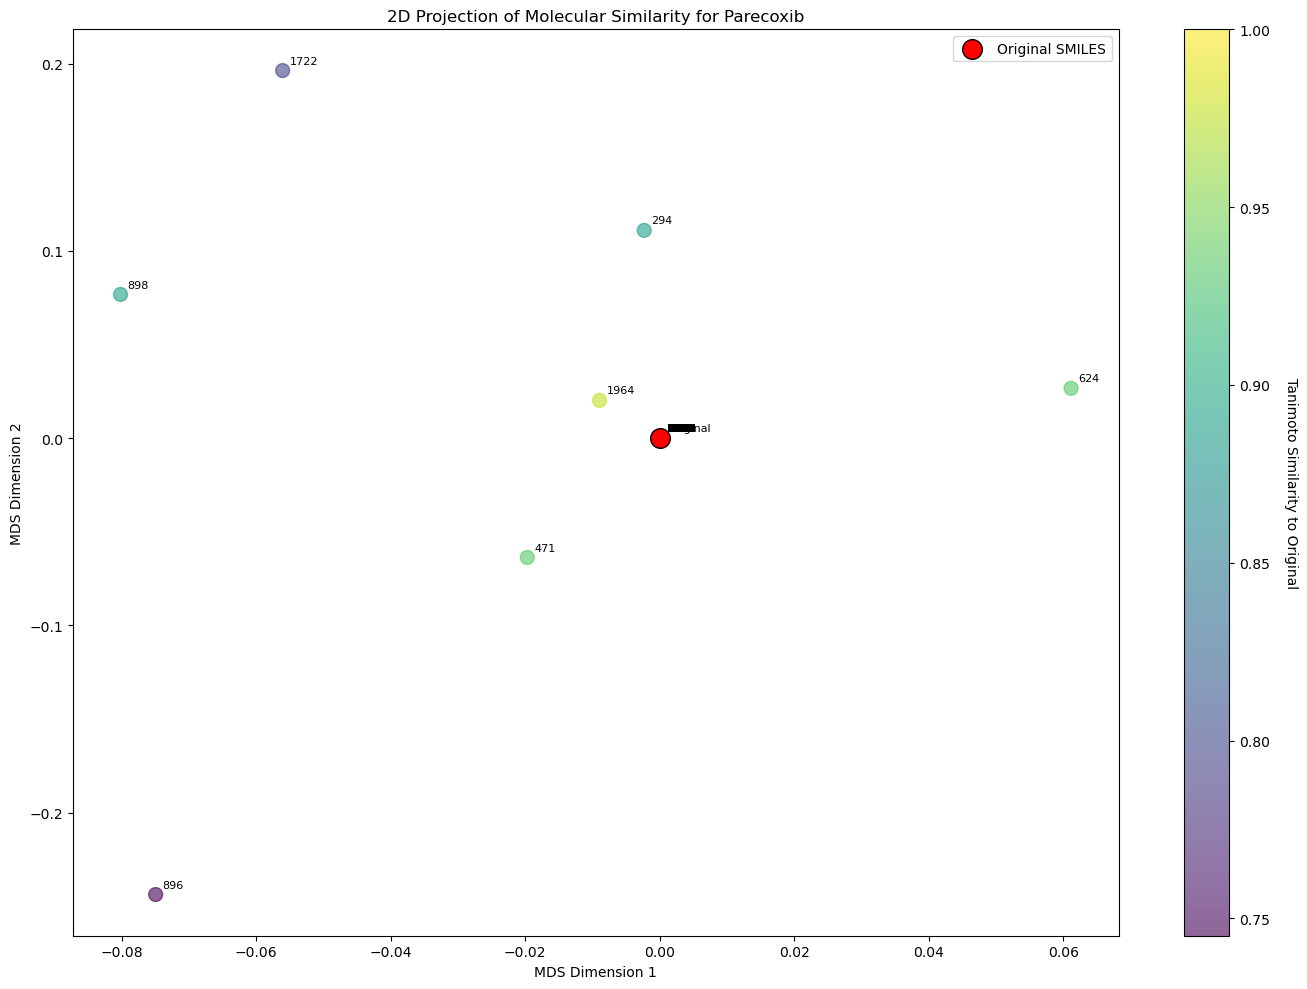

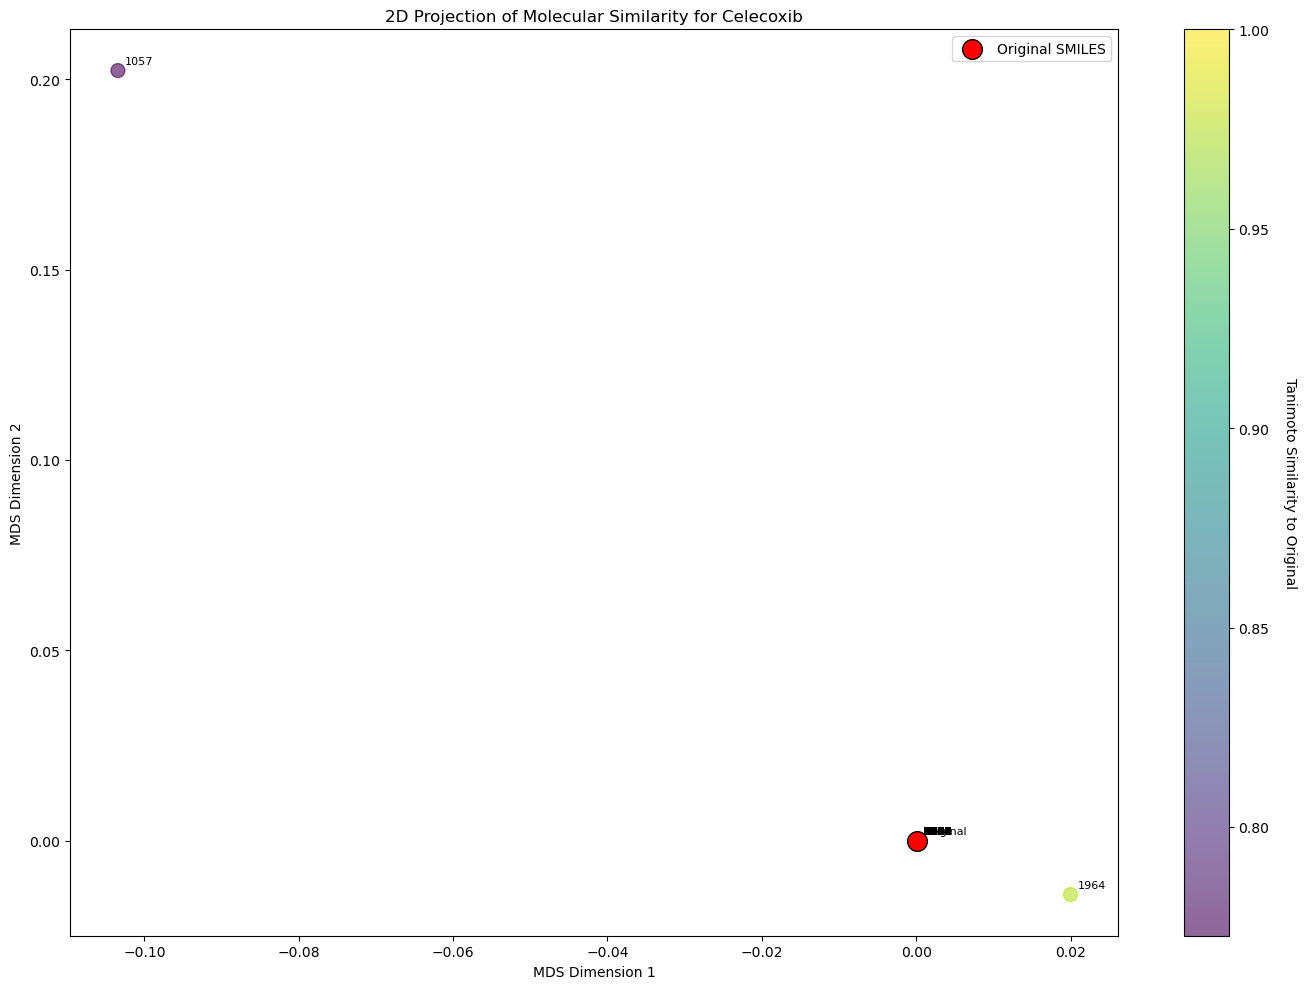

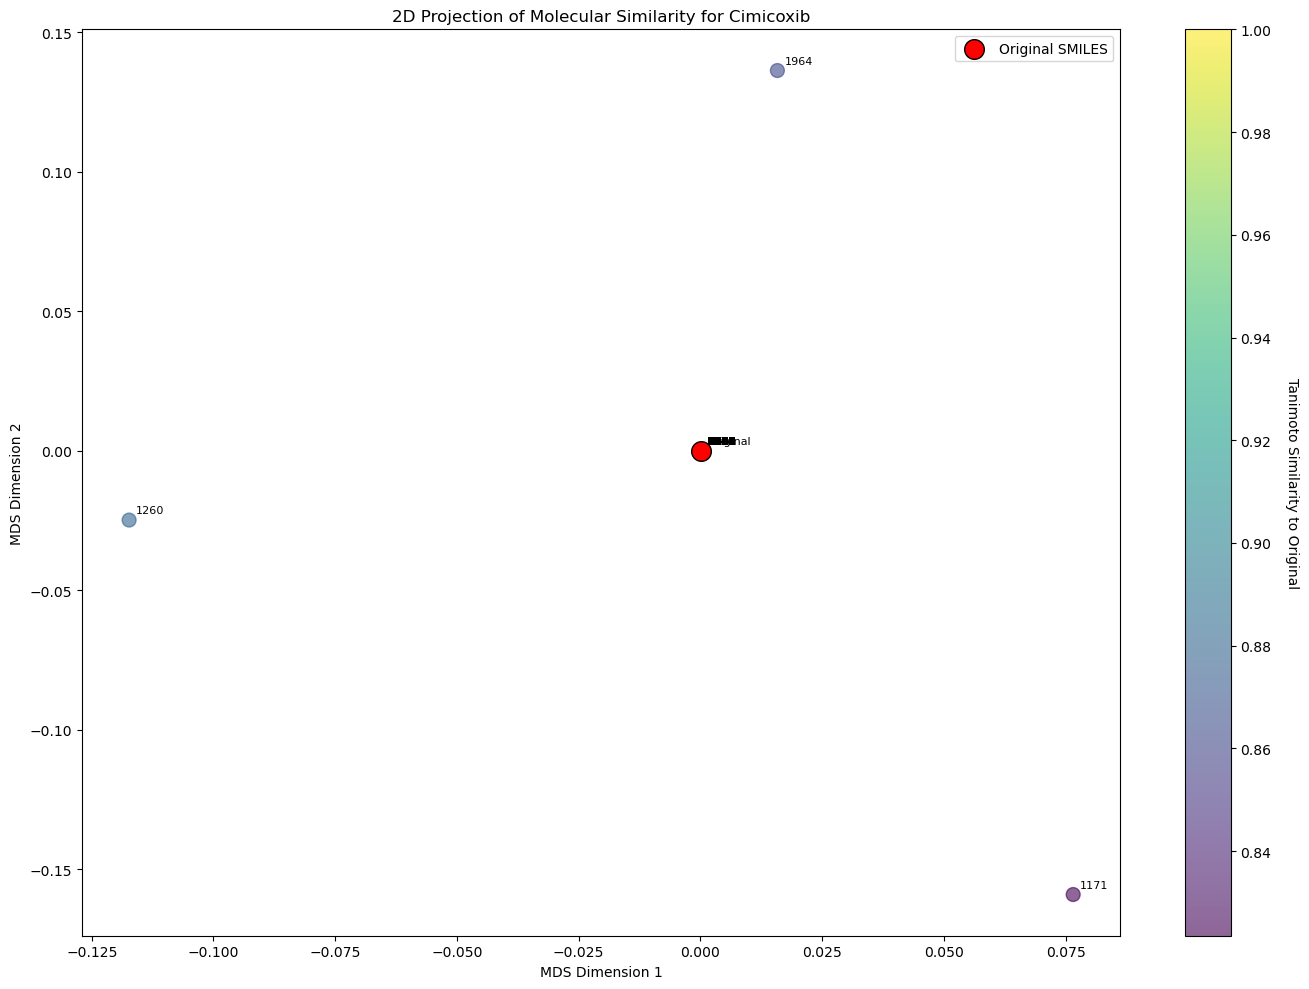

[20:26:49] SMILES Parse Error: syntax error while parsing: Invalid
[20:26:49] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'


Total invalid SMILES found: 1
Removing 1 invalid SMILES from analysis


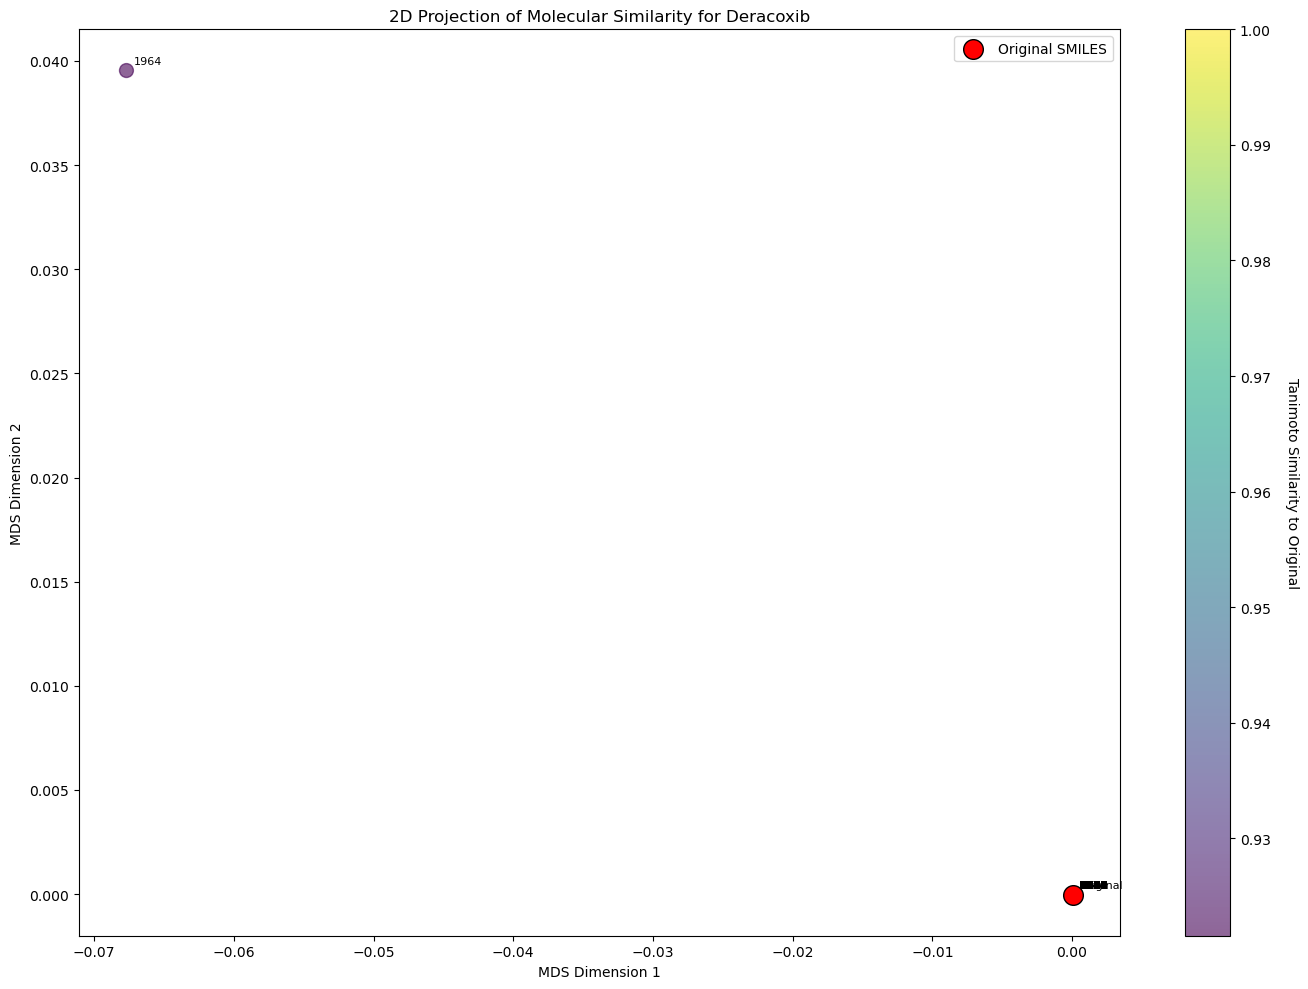

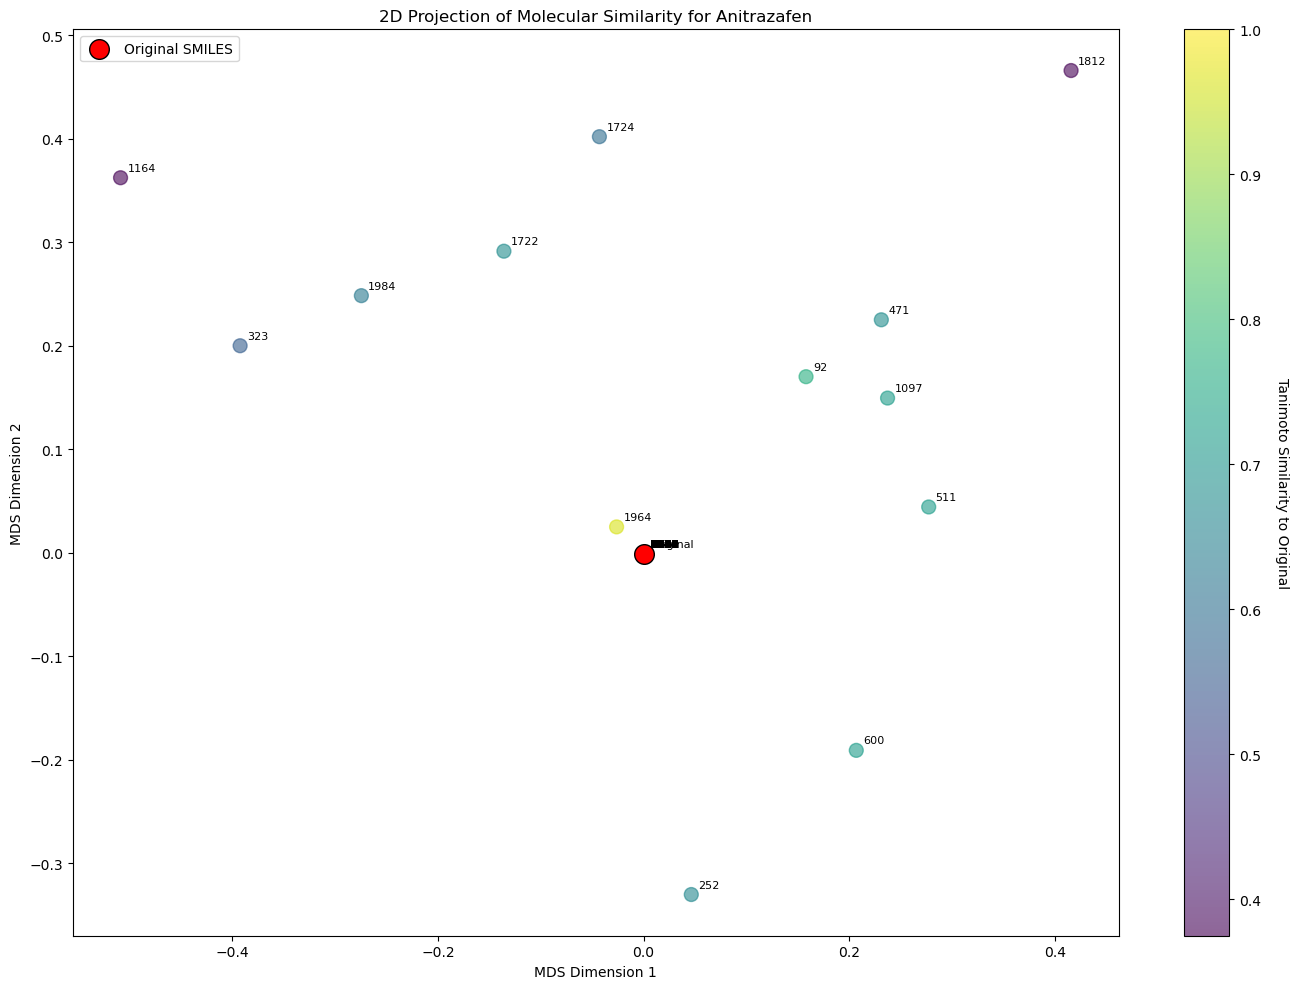

In [36]:
process_and_plot(parecoxib_df)
process_and_plot(celecoxib_df)
process_and_plot(cimicoxib_df)
process_and_plot(deracoxib_df)
process_and_plot(anitrazafen_df)

In [37]:
def plot_tsne_similarity(df, title_column='title', smiles_column='SMILES', 
                        generated_smiles_column='Generated_SMILES'):
    """Plot t-SNE similarity for molecules in the dataframe with a color bar indicating similarity to the original."""
    # Extract SMILES (original + generated)
    original_smiles = df[smiles_column].iloc[0]
    all_smiles = [original_smiles] + df[generated_smiles_column].tolist()
    
    # Generate fingerprints and handle invalid SMILES
    fps, invalid_indices = generate_fingerprints(all_smiles)
    
    if invalid_indices:
        print(f"Removing {len(invalid_indices)} invalid SMILES from analysis")
        # Create mask for valid SMILES
        valid_mask = [i not in invalid_indices for i in range(len(all_smiles))]
        all_smiles = [s for i, s in enumerate(all_smiles) if i not in invalid_indices]
    
    # Calculate similarity matrix for valid molecules
    similarity_matrix = calculate_similarity_matrix(fps)
    
    # Apply t-SNE
    try:
        tsne = TSNE(n_components=2, metric='precomputed', random_state=42)
        coords = tsne.fit_transform(1 - similarity_matrix)
    except Exception as e:
        print(f"Error in t-SNE computation: {str(e)}")
        return None
    
    # Calculate similarities to the original molecule (if original is valid)
    if 0 not in invalid_indices:
        similarities_to_original = similarity_matrix[0, 1:]
    else:
        print("Warning: Original SMILES is invalid")
        return None
    
    # Plot
    plt.figure(figsize=(14, 10))
    
    # Plot generated SMILES with color indicating similarity to original
    scatter = plt.scatter(coords[1:, 0], coords[1:, 1], c=similarities_to_original, 
                         cmap='viridis', alpha=0.6, s=100)
    
    # Plot original SMILES in red
    plt.scatter(coords[0, 0], coords[0, 1], c='red', s=200, label='Original SMILES', 
               edgecolors='black')
    
    # Add color bar
    cbar = plt.colorbar(scatter)
    cbar.set_label('Tanimoto Similarity to Original', rotation=270, labelpad=20)
    
    # Add labels
    valid_flipped_positions = [pos for i, pos in enumerate(df['FlippedBitPosition']) 
                             if i + 1 not in invalid_indices]
    
    for i, smiles in enumerate(all_smiles):
        label = "Original" if i == 0 else f"{valid_flipped_positions[i-1]}"
        plt.annotate(label, (coords[i, 0], coords[i, 1]), xytext=(5, 5), 
                    textcoords='offset points', fontsize=8)
    
    plt.title(f"2D t-SNE Projection of Molecular Similarity for {df[title_column].iloc[0]}")
    plt.xlabel("t-SNE Dimension 1")
    plt.ylabel("t-SNE Dimension 2")
    plt.legend()
    plt.tight_layout()
    
    save_path = os.path.join(INPUT_DIR, f"{df[title_column].iloc[0]}_tanimoto_tsne.png")
    plt.savefig(save_path)
    
    return plt

def process_and_plot_tsne(df):
    """Process a dataframe and generate the t-SNE plot with error handling."""
    try:
        plt = plot_tsne_similarity(df)
        if plt is not None:
            plt.show()
            plt.close()
    except Exception as e:
        print(f"Error processing dataframe for t-SNE: {str(e)}")

In [38]:
process_and_plot_tsne(parecoxib_df)
process_and_plot_tsne(celecoxib_df)
process_and_plot_tsne(cimicoxib_df)
process_and_plot_tsne(deracoxib_df)
process_and_plot_tsne(anitrazafen_df)

Error in t-SNE computation: The parameter init="pca" cannot be used with metric="precomputed".
Error in t-SNE computation: The parameter init="pca" cannot be used with metric="precomputed".
Error in t-SNE computation: The parameter init="pca" cannot be used with metric="precomputed".
Total invalid SMILES found: 1
Removing 1 invalid SMILES from analysis


[20:27:23] SMILES Parse Error: syntax error while parsing: Invalid
[20:27:23] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'


Error in t-SNE computation: The parameter init="pca" cannot be used with metric="precomputed".
Error in t-SNE computation: The parameter init="pca" cannot be used with metric="precomputed".
